In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_column', None)


## 1. Carregar os dados

In [10]:

file_path = 'furtos_agregado_por_cidades2.csv'
df = pd.read_csv(file_path, delimiter=';')


## 2. Pré-processamento

In [11]:

df['Area'] = df['Area'].str.replace(',', '.', regex=True).astype(float)
df.columns = df.columns.str.strip()

if 'Rótulos de Linha' in df.columns:
    df.rename(columns={'Rótulos de Linha': 'Cidade'}, inplace=True)

target_col = 'Total'
feature_cols = ['População', 'Area', 'Densidade_Recalculada']
required_cols = ['Cidade', target_col] + feature_cols

if not all(col in df.columns for col in required_cols):
    missing = [col for col in required_cols if col not in df.columns]
    raise ValueError(f"ERRO: Colunas necessárias ausentes: {missing}")

df_processed = df[required_cols].copy()

X = df_processed[feature_cols]
y = df_processed[target_col]


## 3. Análise com Variação de n_splits de 5 a 20



In [ ]:

modelo = RandomForestRegressor(random_state=42)

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score)
}

n_splits_range = range(5, 21)
resultados_mae = []
resultados_mse = []
resultados_r2 = []

for n_splits in n_splits_range:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    resultados = cross_validate(modelo, X, y, cv=kf, scoring=scoring, return_train_score=False)
    
    resultados_mae.append(resultados['test_MAE'].mean())
    resultados_mse.append(resultados['test_MSE'].mean())
    resultados_r2.append(resultados['test_R2'].mean())



In [13]:
## 4. Gráfico comparativo

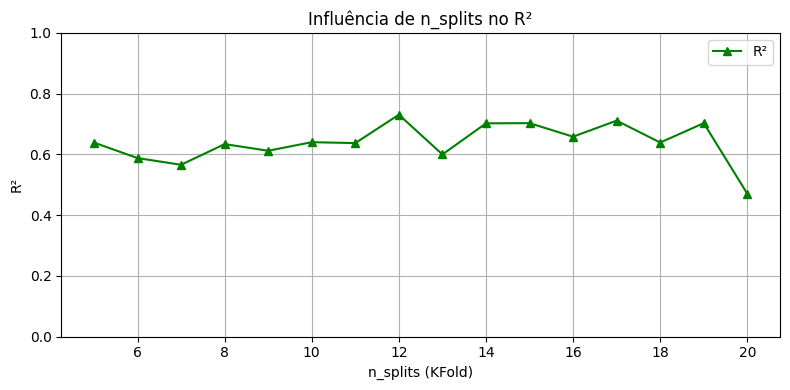

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(n_splits_range, resultados_r2, marker='^', color='green', label='R²')

plt.xlabel('n_splits (KFold)')
plt.ylabel('R²')
plt.title('Influência de n_splits no R²')
plt.ylim(0, 1)  # R² normalmente entre 0 e 1
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()



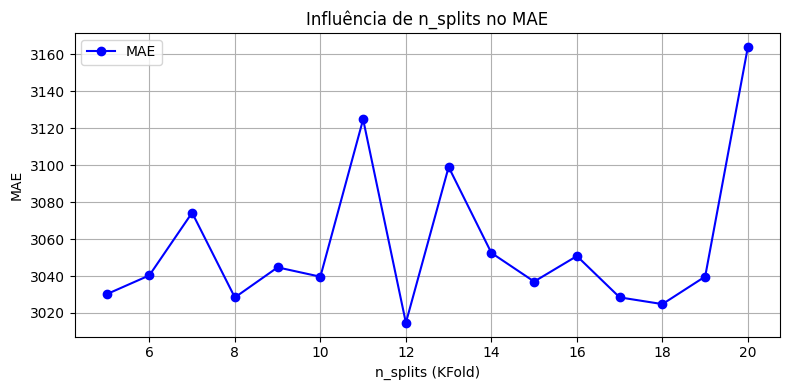

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(n_splits_range, resultados_mae, marker='o', color='blue', label='MAE')

plt.xlabel('n_splits (KFold)')
plt.ylabel('MAE')
plt.title('Influência de n_splits no MAE')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


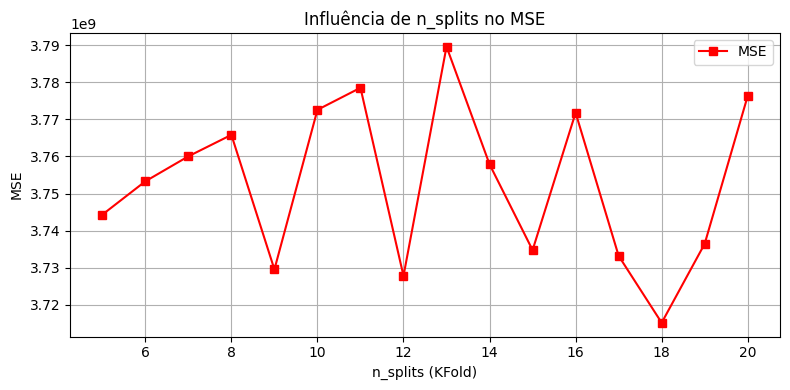

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(n_splits_range, resultados_mse, marker='s', color='red', label='MSE')

plt.xlabel('n_splits (KFold)')
plt.ylabel('MSE')
plt.title('Influência de n_splits no MSE')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()
